# COVID-19 WORLD VACCINATION PROGRESS

The dataset was obtained from kaggle.com and represents the data of vaccinated people as at current date.

The pandas library will be used to load, clean, and filter the data. Matplotlib and Seaborn will be used to provide visualisation for obtaining clear insights on the data being presented.

## Downloading the Dataset

The dataset will be downloaded from kaggle.com using the opendatasets python library.

In [262]:
# !pip install jovian opendatasets --upgrade --quiet

In [263]:
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress'

In [264]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./covid-world-vaccination-progress" (use force=True to force download)


In [265]:
data_dir = './covid-world-vaccination-progress'

In [266]:
import os
os.listdir(data_dir)

['country_vaccinations_by_manufacturer.csv', 'country_vaccinations.csv']

## Data Preparation and Cleaning

This section will be devoted to cleaning the data, filling in missing data etc.

In [271]:
import pandas as pd

In [272]:
covid_df = pd.read_csv(data_dir + '/country_vaccinations.csv')

View the first five entries to get a feel of what the data looks like.

In [273]:
covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


View the range of data, null value-counts, shape of the data and data types.

In [274]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57460 entries, 0 to 57459
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              57460 non-null  object 
 1   iso_code                             57460 non-null  object 
 2   date                                 57460 non-null  object 
 3   total_vaccinations                   31034 non-null  float64
 4   people_vaccinated                    29469 non-null  float64
 5   people_fully_vaccinated              26655 non-null  float64
 6   daily_vaccinations_raw               25416 non-null  float64
 7   daily_vaccinations                   57206 non-null  float64
 8   total_vaccinations_per_hundred       31034 non-null  float64
 9   people_vaccinated_per_hundred        29469 non-null  float64
 10  people_fully_vaccinated_per_hundred  26655 non-null  float64
 11  daily_vaccinations_per_milli

**Points to Note**
 - The numerical columns all have some null values. These will be dropped from any subsequent calculations.
 - There are some columns not relevant to this analysis, and will be dropped subsequently.
 - The date column is of type object. This will be converted to type datetime64.

View unique values for categorical data

In [275]:
unique_values = covid_df[['country', 'vaccines']].agg(lambda x:[x.nunique()])

In [276]:
unique_values

,country,vaccines
0,223,76


There are 76 unique entries for vaccines, but each entry contains multiple duplicated vaccine types. This will be cleaned and a completely unique vaccine dataframe will be generated.

Drop unneeded columns:

In [277]:
covid_df.drop(['iso_code', 'daily_vaccinations_raw', 'source_name','source_website'], axis=1, inplace=True)

Convert date column type:

In [278]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df.date.dtype

dtype('<M8[ns]')

Create a dataframe containing unique values of vaccines, and all the countries which use them.

In [279]:
def create_df(df):
    arr = []
    prev_str = ''
    for country, vac_str in df.iterrows():
        vac_str = vac_str.vaccines
        if vac_str == prev_str: continue
        for vac_name in vac_str.split(','):
            vac_name = vac_name.strip()
            if vac_name not in arr:
                arr.append(vac_name)
                df.loc[:, vac_name] = False
            df.at[country, vac_name] = True
        prev_str = vac_str
    return df

In [280]:
vaccine_list = covid_df[['country','vaccines']]
vaccine_list.set_index('country', drop=True, inplace=True)

In [281]:
vaccine_df = create_df(vaccine_list)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [282]:
vaccine_df.drop('vaccines', axis=1, inplace=True)

In [283]:
vaccine_df.head()

,Johnson&Johnson,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,Moderna,CanSino,Covaxin,Sinopharm/Wuhan,ZF2001,Abdala,Soberana02,COVIran Barekat,QazVac,Sputnik Light,EpiVacCorona,Medigen
country,,,,,,,,,,,,,,,,,,
Afghanistan,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Afghanistan,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Exploratory Analysis and Visualization

An exploratory analysis will be carried out on the data to show relationships between key variables.

In [285]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Majority of the columns (except daily_vaccinations) are rolling cumulative totals. Therefore, a single value will be picked at a certain point in time (most recent is November 2021) for each column to derive totals.

In [286]:
totals = covid_df.groupby('country')[['country','total_vaccinations', 'people_vaccinated','people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].max()
totals.reset_index(drop=True, inplace=True)
totals.head()

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,5852810.0,3097293.0,2755517.0,7.78,6.92
1,Albania,2000104.0,1047822.0,924194.0,36.47,32.17
2,Algeria,11316115.0,6418827.0,4897288.0,14.39,10.98
3,Andorra,104534.0,54999.0,49535.0,71.10,64.04
4,Angola,7246966.0,5269623.0,1977343.0,15.53,5.83


In [287]:
totals.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
count,223.00,223.00,223.00,223.00,223.00
mean,34160448.01,18494960.78,14598964.69,47.96,41.38
std,181014693.04,94609748.14,77956713.32,27.83,27.29
min,94.00,47.00,47.00,0.01,0.00
25%,323713.00,240328.00,165926.00,24.18,15.80
50%,2093453.00,1232357.00,901961.00,52.60,44.14
75%,12516503.50,6186241.00,5674501.00,71.53,65.27
max,2389568000.00,1155058478.00,1072454000.00,121.06,118.18


The statistics laid out above reveals the following insight:
- The highest number of total vaccinations for a country is 2.3 billion while the minimum is 94 people.
- The highest ratio of vaccinations per hundred people is 121 vaccinations. This means the total population for that particular country is fully vaccinated. Meanwhile the minimum is 0.

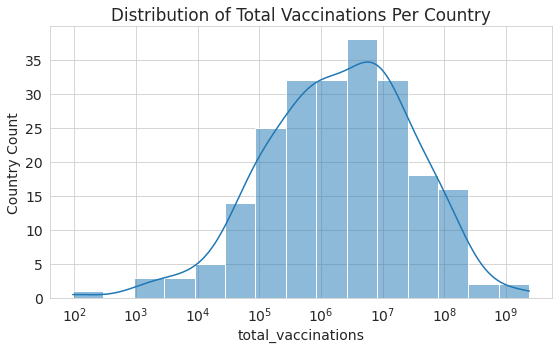

In [288]:
ax = sns.histplot(data=totals, x='total_vaccinations', log_scale=True, kde=True);
ax.set_ylabel('Country Count')
ax.set_title('Distribution of Total Vaccinations Per Country');

The histogram above shows that majority of the countries have administered between 15,000 (10^5) and 100,000,000 (10^8) vaccinations. The data is highly skewed, it is therefore shown in units of log space, to show the actual shape of the data.

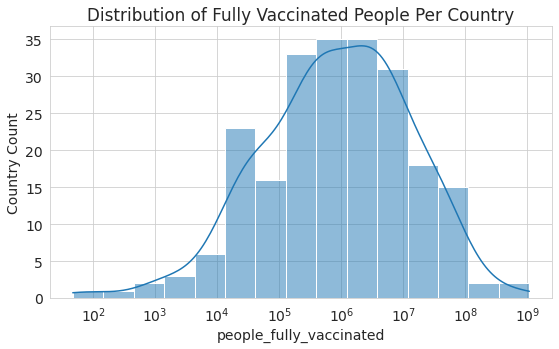

In [289]:
ax2 = sns.histplot(data=totals, x='people_fully_vaccinated', log_scale=True, kde=True);
ax2.set_ylabel('Country Count')
ax2.set_title('Distribution of Fully Vaccinated People Per Country');

The histogram above shows that countries who have majority of fully vaccinated people are numbered between 15,000 (10^5) and 100,000,000 (10^8).
The data is highly skewed, it is therefore shown in units of log space, to show the actual shape of the data.

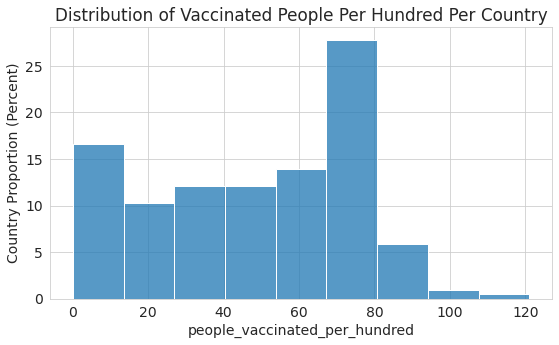

In [290]:
ax3 = sns.histplot(data=totals, x='people_vaccinated_per_hundred', stat='percent');
ax3.set_ylabel('Country Proportion (Percent)')
ax3.set_title('Distribution of Vaccinated People Per Hundred Per Country');

The histogram above shows that about 27 percent of countries have the highest number of vaccinations per hundred people, which is between 70 and 80 people.

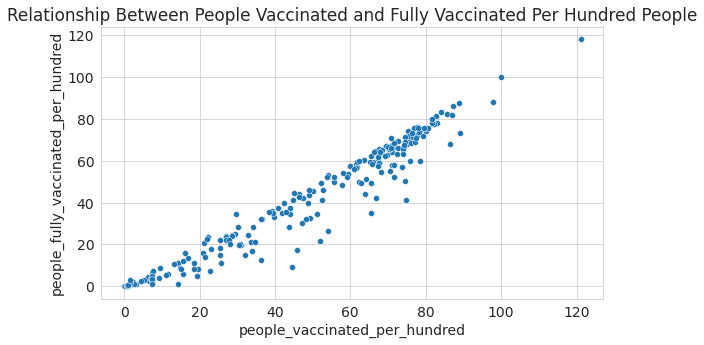

In [348]:
ax4 = sns.scatterplot(data=totals, x='people_vaccinated_per_hundred', y='people_fully_vaccinated_per_hundred')
ax4.set_title('Relationship Between People Vaccinated and Fully Vaccinated Per Hundred People');

The above shows an interesting pattern. The relationship is mostly linear, suggesting that for most countries along the traceable line, people vaccinated and fully vaccinated per hundred are the same i.e. the population is totally vaccinated. The straggling points below the line show the countries who are yet to achieve full vaccination.

In [351]:
daily = covid_df[['date','daily_vaccinations']].resample('D', on='date').sum()

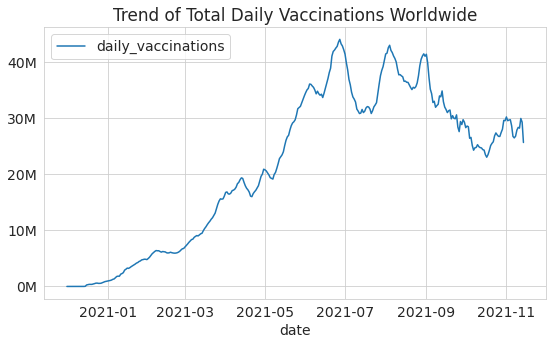

In [293]:
ax5 = sns.lineplot(data=daily)
ax5.set_title('Trend of Total Daily Vaccinations Worldwide');
format_func = lambda x,pos: f'{int(x/1000000)}M'
ax5.yaxis.set_major_formatter(FuncFormatter(format_func))

The above plot shows a steady rise in vaccinations from December 2020 up till July 2021, after which we observe a decline till date, which is largely due to those countries who have fully vaccinated majority of their population.

## Asking and Answering Questions

The following questions will be posed about the dataset in order to achieve indepth insight:
- What are the top 10 countries with the highest number of total vaccinations?
- What are the top 10 countries with the highest number of vaccinations per hundred people?
- What are the top 10 countries with the highest daily vaccination per million people?
- What are the unique types of vaccines being deployed worldwide?
- What is the popularity of each vaccine being used worldwide?

#### Q1: What are the top 10 countries with the highest number of total vaccinations?

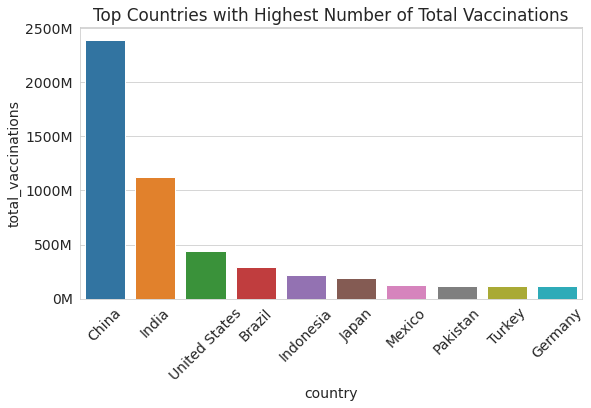

In [311]:
top_total_vaccinations = totals.sort_values('total_vaccinations', ascending=False)[['country', 'total_vaccinations']].head(10)
ax6 = sns.barplot(data=top_total_vaccinations, x='country', y='total_vaccinations')
ax6.set_title('Top Countries with Highest Number of Total Vaccinations');
format_func = lambda x,pos: f'{int(x/1000000)}M'
ax6.yaxis.set_major_formatter(FuncFormatter(format_func))
ax6.tick_params(axis='x', rotation=45)

China leads with the highest number of vaccinations in the world.

#### Q2: What are the top 10 countries with the highest number of vaccinations per hundred people?

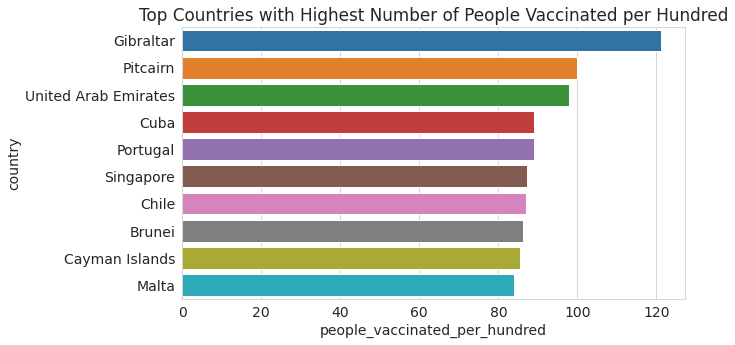

In [352]:
top_total_vaccinations = totals.sort_values('people_vaccinated_per_hundred', ascending=False)[['country', 'people_vaccinated_per_hundred']].head(10)
ax6 = sns.barplot(data=top_total_vaccinations, y='country', x='people_vaccinated_per_hundred')
ax6.set_title('Top Countries with Highest Number of People Vaccinated per Hundred');

Gibraltar leads with the highest number of people vaccinated per hundred.

#### Q3: What are the top 10 countries with the highest daily vaccination per million people?

In [334]:
highest_daily_vaccinations = covid_df[['country', 'daily_vaccinations_per_million']].groupby('country').mean().sort_values('daily_vaccinations_per_million', ascending=False).head(10)
highest_daily_vaccinations

,daily_vaccinations_per_million
country,
Niue,36643.428571
Falkland Islands,21185.393939
Saint Helena,13915.164835
Cuba,13455.866667
Tokelau,12718.106195
Pitcairn,10891.797619
Nauru,9630.317241
Gibraltar,9170.714286
Bhutan,8140.132420


The top 10 countries with highest daily vaccination rates are presented above. They are typically small island countries with a negligible population.

#### Q4: What are the unique types of vaccine being deployed worldwide?

In [323]:
vaccine_df.columns.to_series().reset_index(drop=True)

0        Johnson&Johnson
1     Oxford/AstraZeneca
2        Pfizer/BioNTech
3      Sinopharm/Beijing
4                Sinovac
5              Sputnik V
6                Moderna
7                CanSino
8                Covaxin
9        Sinopharm/Wuhan
10                ZF2001
11                Abdala
12            Soberana02
13       COVIran Barekat
14                QazVac
15         Sputnik Light
16          EpiVacCorona
17               Medigen
dtype: object

There are 18 different types of vaccines being used over the world from different manufacturers.

#### Q5: What is the popularity of each vaccine being used worldwide?

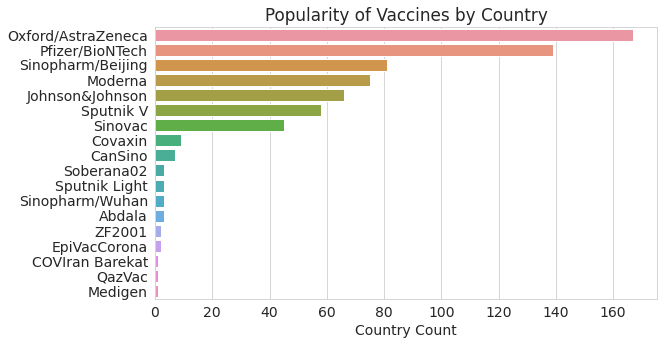

In [345]:
vaccine_popularity = vaccine_df.groupby(vaccine_df.index).mean().sum().sort_values(ascending=False).to_frame()
vaccine_popularity.columns = ['Country Count']
ax7 = sns.barplot(data=vaccine_popularity, x='Country Count', y=vaccine_popularity.index)
ax7.set_title('Popularity of Vaccines by Country');

Oxford/Astrazeneca is the most popular vaccine, used in over 160 countries.

## Inferences and Conclusion

The following is a summary of the analysis carried out in this exploratory study:
- Majority of countries have administered between 15,000 and 100,000,000 vaccinations. This corresponds roughly to the same amount of people that have been fully vaccinated.
- 27 percent of countries have the highest number of vaccinations per hundred people, which is between 70 and 80 people.
- Majority of countries have been able to achieve full vaccination per hundred people.
- There was a steady rise in vaccinations from December 2020 up till July 2021, after which a decline was observed, which is largely due to those countries who have vaccinated majority of their population.
- China leads with the most number of vaccinations worldwide.
- Small island nations have the most vaccinations per million people due to their relatively small population size.
- There are 18 vaccines being deployed worldwide, out of which the Oxford/Astrazeneca brand is the most used in over 160 countries.

## References and Future Work

The COVID-19 dataset is being updated on a daily basis and it would be interesting to continue to observe the vaccination trend over time.

References:
- Daily and Total Vaccination for COVID-19 in the World from Our World in Data: https://www.kaggle.com/gpreda/covid-world-vaccination-progress